In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,train_test_split

In [2]:
data=pd.read_csv("Titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#筛选特征 "Cabin"确实太多,"Name"不重要,"Ticket"影响不大
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [6]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [7]:
#处理缺失值
data["Age"]=data["Age"].fillna(data["Age"].mean())#这里将缺失值填补为平均年龄

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [9]:
#目前的info里面只有Embarked有两个缺失，那么直接drop
data=data.dropna()

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [11]:
data["Embarked"].unique()#去除所有值且去重

array(['S', 'C', 'Q'], dtype=object)

In [12]:
data["Embarked"].unique().tolist()#变成列表

['S', 'C', 'Q']

In [13]:
labels=data["Embarked"].unique().tolist()

In [14]:
labels.index("C")

1

In [15]:
data["Embarked"]=data["Embarked"].apply(lambda x: labels.index(x))

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [17]:
(data["Sex"]=="male").astype("int")

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [18]:
data["Sex"]=(data["Sex"]=="male").astype("int")
#这个warning表示的是data直接["Sex"]的方式将会被删除
#下面介绍两种常用的方法

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [19]:
data.loc[:,"Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [20]:
data.iloc[:,3]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [21]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [22]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [23]:
#下面回到sklearn
#取出列表里面除了Survived的那一列
data.iloc[:,data.columns!="Survived"]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0
1,2,1,0,38.000000,1,0,71.2833,1
2,3,3,0,26.000000,0,0,7.9250,0
3,4,1,0,35.000000,1,0,53.1000,0
4,5,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0
887,888,1,0,19.000000,0,0,30.0000,0
888,889,3,0,29.699118,1,2,23.4500,0
889,890,1,1,26.000000,0,0,30.0000,1


In [24]:
data.iloc[:,data.columns=="Survived"]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [25]:
x=data.iloc[:,data.columns!="Survived"]
y=data.iloc[:,data.columns=="Survived"]

In [26]:
Xtrain,Xtest,Ytrain,Ytest=train_test_split(x,y,test_size=0.3)

In [27]:
Xtrain.shape

(622, 8)

In [28]:
Xtrain.index=range(Xtrain.shape[0])

In [29]:
Xtrain.shape[0]

622

In [30]:
Xtrain.index

RangeIndex(start=0, stop=622, step=1)

In [31]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.index=range(i.shape[0])

In [32]:
Ytrain

,Survived
0,0
1,1
2,0
3,1
4,0
...,...
617,0
618,0
619,1
620,0


In [33]:
clf=DecisionTreeClassifier(random_state=25)
clf=clf.fit(Xtrain,Ytrain)
score=clf.score(Xtest,Ytest)
score

0.7602996254681648

In [34]:
#交叉验证
clf=DecisionTreeClassifier(random_state=25)
score=cross_val_score(clf,x,y,cv=10).mean()
score

0.7469611848825333

0.8166624106230849


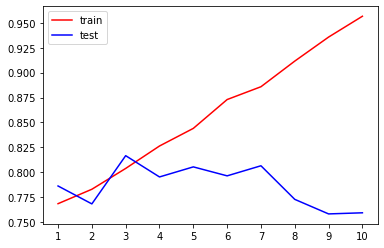

In [35]:
tr=[]#训练集的score
te=[]#测试集的core
for i in range(10):
    clf=DecisionTreeClassifier(random_state=25
                              ,max_depth=i+1
                              ,criterion="entropy"
                              )
    clf=clf.fit(Xtrain,Ytrain)
    score_tr=clf.score(Xtrain,Ytrain)
    score_te=cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color='red',label="train")
plt.plot(range(1,11),te,color='b',label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [36]:
import numpy as np
np.linspace(0,0.5,50)#随机的50个有序的0-0.5之间的数
gini_threholds=np.linspace(0,0.5,50)#一般的基尼系数边界
entropy_threholds=np.linspace(0,1,50)#一般的信息熵边界


#网课搜索：同时调整多个参数，枚举技术
#parameters是一串参数和这些参数对应的我们希望网格搜索来搜索的取值范围
#参数太多会运行很长时间
parameters={"criterion":("gini","entropy")
            ,"splitter":("best","random")
            ,"max_depth":[*range(1,10)]
#             ,"min_samples_leaf":[*range(1,50,5)]
#             ,"min_impurity_decrease":[*np.linspace(0,0.5,50)]#这个其实一般不好调整
           }

clf=DecisionTreeClassifier(random_state=25)
GS=GridSearchCV(clf,parameters,cv=10)
GS=GS.fit(Xtrain,Ytrain)

In [37]:
GS.best_params_#最优参数

{'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}

In [38]:
GS.best_score_#最优分数

0.7958525345622119

In [46]:
data_test=pd.read_csv("test.csv")

In [47]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [48]:
data_test.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [49]:
data_test["Age"]=data_test["Age"].fillna(data_test["Age"].mean())#这里将缺失值填补为平均年龄

In [50]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [51]:
data_test.loc[:,"Fare"]

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [52]:
data_test["Fare"]=data_test["Fare"].fillna(data_test["Fare"].mean())

In [53]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [54]:
data_test["Embarked"]=data_test["Embarked"].apply(lambda x: labels.index(x))

In [55]:
data_test["Sex"]=(data_test["Sex"]=="male").astype("int")

In [56]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int32
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
dtypes: float64(2), int32(1), int64(5)
memory usage: 24.6 KB


In [58]:
Xtrain.shape

(622, 8)

In [59]:
Xtrain.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [60]:
data_test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [61]:
res=GS.predict(data_test)

In [91]:
res=res.reshape(-1,1)

In [92]:
type(res)

numpy.ndarray

In [93]:
id=data_test.loc[:,'PassengerId']

In [94]:
type(id.values)

numpy.ndarray

In [95]:
psgid=id.values.reshape(-1,1)

In [96]:
psgid.shape

(418, 1)

In [97]:
res.shape

(418, 1)

In [98]:
resualt=np.concatenate((psgid,res),axis=1)

In [103]:
resualt.shape

(418, 2)

In [106]:
ResFrame = pd.DataFrame(resualt,columns=["PassengerId","Survived"])

In [109]:
ResFrame.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [112]:
ResFrame.to_csv('res.csv',index=False)#不输出索引